In [1]:
import pandas as pd
frames = []
for i in range(1,17):
    frames.append(pd.read_csv(r'data\dataset%d.csv'%(i), error_bad_lines=False,sep=';'))
us_election = pd.concat(frames,ignore_index=True)

In [2]:
us_election.head()

,ACFS,Adult.obesity,Adult.smoking,Adults.65.and.Older.Living.in.Poverty,African.American.Population,Amerindian,Asian,Asian.American.Population,At.Least.Bachelor.s.Degree,At.Least.High.School.Diploma,...,summer_TAVG,summer_TMAX,summer_TMIN,temp,temp_bins,votes,winter_PRCP,winter_TAVG,winter_TMAX,winter_TMIN
0,0.000044,0.300,0.183,6.85,23.55,0.55,2.35,2.35,37.4,87.8,...,773.0,885.0,660.0,15.333333,"14.9, 16.6",159473,1607.0,412.0,524.0,300.0
1,0.000024,0.314,0.173,7.95,3.85,4.75,1.45,1.45,17.9,83.7,...,NaN,NaN,NaN,NaN,NaN,77387,NaN,NaN,NaN,NaN
2,0.000115,0.373,0.251,21.30,46.50,0.35,0.25,0.25,13.5,71.9,...,783.0,903.0,663.0,17.333333,"16.6, 18.5",10390,NaN,470.0,601.0,339.0
3,0.000043,0.384,0.231,15.45,31.45,0.25,0.40,0.40,11.9,75.7,...,NaN,NaN,NaN,NaN,NaN,33218,NaN,NaN,NaN,NaN
4,0.000507,0.368,0.362,24.15,53.60,0.10,0.30,0.30,12.6,69.3,...,813.0,918.0,708.0,17.833333,"16.6, 18.5",4176,1662.5,454.0,561.0,347.5


In [2]:
import random
state = set()
for i in range(3113):
    if (type(us_election.ST[i]) is not float):
        state.add(us_election.ST[i])
data = random.sample(range(50),10)
select_state =set()
for i in range(10):
    select_state.add(list(state)[data[i]])

states = list(select_state)

In [3]:
df3 = pd.DataFrame({'State':'','Year':0,'Party':'Republicans','Mean':0},range(3))
df4 = pd.DataFrame({'State':'','Year':0,'Party':'Democrats','Mean':0},range(3))
df5 = pd.DataFrame({'State':'','Year':0,'Party':'','Mean':0},range(0))
df5

,Mean,Party,State,Year


In [4]:
from numpy import mean
for i in range(10):
    republicans_16 = []
    republicans_12 = []
    republicans_08 = []
    democrats_16 = []
    democrats_12 = []
    democrats_08 = []
    for j in range(3113):
        if us_election.ST[j] == states[i]:
            republicans_16.append(us_election['Republicans 2016'][j])
            republicans_12.append(us_election['Republicans 2012'][j])
            republicans_08.append(us_election['Republicans 2008'][j])
            democrats_16.append(us_election['Democrats 2016'][j])
            democrats_12.append(us_election['Democrats 2012'][j])
            democrats_08.append(us_election['Democrats 2008'][j])
    r_mean_2016 = mean(republicans_16)
    r_mean_2012 = mean(republicans_12)
    r_mean_2008 = mean(republicans_08)
    d_mean_2016 = mean(democrats_16)
    d_mean_2012 = mean(democrats_12)
    d_mean_2008 = mean(democrats_08)
    
    df3.loc[0,'Mean'] = r_mean_2016
    df3.loc[1,'Mean'] = r_mean_2012
    df3.loc[2,'Mean'] = r_mean_2008
    df3.loc[0,'State'] = states[i]
    df3.loc[1,'State'] = states[i]
    df3.loc[2,'State'] = states[i]
    df3.loc[0,'Year'] = 2016
    df3.loc[1,'Year'] = 2012
    df3.loc[2,'Year'] = 2008
    df5 = pd.concat([df5,df3])
    df4.loc[0,'Mean'] = d_mean_2016
    df4.loc[1,'Mean'] = d_mean_2012
    df4.loc[2,'Mean'] = d_mean_2008
    df4.loc[0,'State'] = states[i]
    df4.loc[1,'State'] = states[i]
    df4.loc[2,'State'] = states[i]
    df4.loc[0,'Year'] = 2016
    df4.loc[1,'Year'] = 2012
    df4.loc[2,'Year'] = 2008
    df5 = pd.concat([df5,df4])
df5

,Mean,Party,State,Year
0,0.565912,Republicans,OR,2016
1,0.545719,Republicans,OR,2012
2,0.520375,Republicans,OR,2008
0,0.362474,Democrats,OR,2016
1,0.416561,Democrats,OR,2012
2,0.448095,Democrats,OR,2008
0,0.559441,Republicans,CO,2016
1,0.545903,Republicans,CO,2012
2,0.528469,Republicans,CO,2008
0,0.366306,Democrats,CO,2016


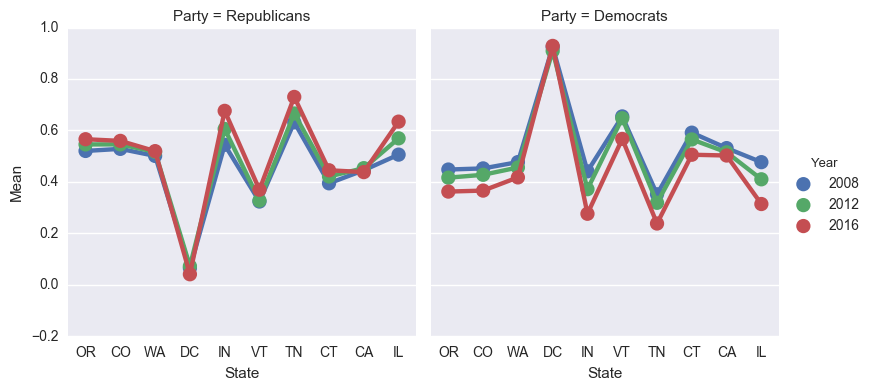

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
g = sns.factorplot(x="State", y="Mean", hue="Year",col="Party", data=df5)
plt.savefig("Republicans_and_Democrats_2008_2012_2016.png")

In [6]:
df5.to_csv('Analysis4_output.csv', sep='\t',encoding='utf-8')